# <span style='color:Gainsboro; font-size:45px'>Projeto de Estudo em Deep Learning com <span style='color:#ff9100; font-size:40px'>TensorFlow</span>, <span style='color:#d00000; font-size:40px'>Keras</span></span>
## <span style='color:DarkSlateGray; font-size:25px'>Classificação de Imagens com Redes Neurais</span>
## <span style='color:SteelBlue; font-size:25px'> Classificação sobre um conjunto de dados meteorológicos.</span>

<span style='color:Gray; font-size:13px'></span>

In [1]:
import os
import json
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

### Conhecendo os dados e sua estrutura

In [2]:
local_data = './datasets/nature-dataset/'
for dirpath, dirnames,filenames in os.walk(local_data):
    print(f"Diretory: {dirpath}")
    print(f"Number of images: {len(filenames)}")
    print()

Diretory: ./datasets/nature-dataset/
Number of images: 1

Diretory: ./datasets/nature-dataset/valid
Number of images: 1

Diretory: ./datasets/nature-dataset/valid/Rain
Number of images: 17

Diretory: ./datasets/nature-dataset/valid/Shine
Number of images: 44

Diretory: ./datasets/nature-dataset/valid/Sunrise
Number of images: 48

Diretory: ./datasets/nature-dataset/valid/Cloud
Number of images: 41

Diretory: ./datasets/nature-dataset/test
Number of images: 1

Diretory: ./datasets/nature-dataset/test/Rain
Number of images: 42

Diretory: ./datasets/nature-dataset/test/Shine
Number of images: 50

Diretory: ./datasets/nature-dataset/test/Sunrise
Number of images: 70

Diretory: ./datasets/nature-dataset/test/Cloud
Number of images: 60

Diretory: ./datasets/nature-dataset/train
Number of images: 1

Diretory: ./datasets/nature-dataset/train/Rain
Number of images: 158

Diretory: ./datasets/nature-dataset/train/Shine
Number of images: 161

Diretory: ./datasets/nature-dataset/train/Sunrise
Numbe

In [3]:
dados_treino = './datasets/nature-dataset/train'
dados_valid = './datasets/nature-dataset/valid'
dados_teste = './datasets/nature-dataset/test'

In [4]:
def recuperando_arquivos(train_dir, test_dir):
    train_labels = os.listdir(train_dir)
    print(f"Rótulos de treinamento: {train_labels}")
    print(f"Número de rótulos: {len(train_labels)}\n")
    test_labels = os.listdir(test_dir)
    print(f"Rótulos de teste: {test_labels}")
    print(f"Número de rótulos: {len(test_labels)}\n")
    return train_labels, test_labels

train_labels, test_labels = recuperando_arquivos(dados_treino, dados_teste)

Rótulos de treinamento: ['Rain', '.DS_Store', 'Shine', 'Sunrise', 'Cloud']
Número de rótulos: 5

Rótulos de teste: ['Rain', '.DS_Store', 'Shine', 'Sunrise', 'Cloud']
Número de rótulos: 5



In [5]:
def visualizar_imagens_randomicamente(target_dir, num_images):
    subdirs = [d for d in os.listdir(target_dir) if os.path.isdir(os.path.join(target_dir, d))]

    random.shuffle(subdirs)
    select_images_subdir = subdirs[:num_images]


    fig, axes = plt.subplots(1,num_images, figsize=(15,9))
    for i, subdir in enumerate(select_images_subdir):
        image_paths = [f for f in os.listdir(os.path.join(target_dir, subdir))]
        image_path = random.choice(image_paths)
        image = plt.imread(os.path.join(target_dir, subdir, image_path))
    
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(subdir)
    print(f"Shape da Image: {image.shape}")
    plt.show()

Shape da Image: (194, 260, 3)


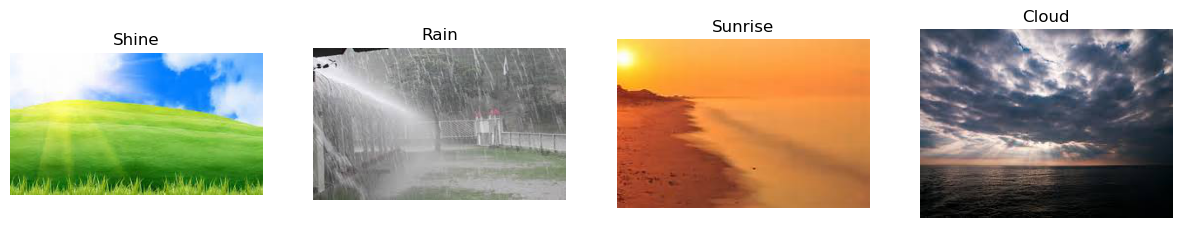

In [6]:
visualizar_imagens_randomicamente(dados_treino, num_images=4 )

#### Preprocessamento dos dados
Vamos redimensionar as imagens e normalizá-las para treinamento.

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen  = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

In [8]:
train_data = train_datagen.flow_from_directory(dados_treino,
                                               batch_size=64,
                                               target_size=(224,224),
                                               class_mode='categorical')
test_data = test_datagen.flow_from_directory(dados_teste,
                                             batch_size=64,
                                             target_size=(224,224),
                                             class_mode='categorical')
valid_data = valid_datagen.flow_from_directory(dados_valid,
                                               batch_size=64,
                                               target_size=(224,224),
                                               class_mode='categorical')

Found 757 images belonging to 4 classes.
Found 222 images belonging to 4 classes.
Found 146 images belonging to 4 classes.


#### Criando o modelo

In [9]:
model_v1 = Sequential()
model_v1.add(Input(shape=(224,224,3)))
model_v1.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model_v1.add(MaxPool2D(pool_size=(2,2)))
model_v1.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model_v1.add(MaxPool2D(pool_size=(2,2)))
model_v1.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model_v1.add(MaxPool2D(pool_size=(2,2)))
model_v1.add(Flatten())
model_v1.add(Dense(1050, activation='relu'))
model_v1.add(Dense(4, activation='softmax'))

In [10]:
model_v1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1050)           │    45,428,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         4,204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,456,038 (173.40 MB)

 Trainable params: 45,456,038 (173.40 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model_v1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
early = EarlyStopping(monitor='val_accuracy', patience=6,
                      restore_best_weights=True,
                      verbose=1)

In [13]:
hist_1 = model_v1.fit(train_data,
                      epochs=15,
                      validation_data=valid_data,
                      callbacks=[early])

Epoch 1/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 428ms/step - accuracy: 0.2754 - loss: 3.9063 - val_accuracy: 0.5342 - val_loss: 0.9677
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 400ms/step - accuracy: 0.5708 - loss: 0.9046 - val_accuracy: 0.8151 - val_loss: 0.7684
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 398ms/step - accuracy: 0.8010 - loss: 0.5802 - val_accuracy: 0.7808 - val_loss: 0.7194
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 405ms/step - accuracy: 0.8763 - loss: 0.3478 - val_accuracy: 0.8699 - val_loss: 0.4893
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 406ms/step - accuracy: 0.8786 - loss: 0.3102 - val_accuracy: 0.8562 - val_loss: 0.5548
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 401ms/step - accuracy: 0.9188 - loss: 0.2433 - val_accuracy: 0.8493 - val_loss: 0.6835
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 406ms/step - accuracy: 0.9494 - loss: 0.1503 - val_accuracy: 0.8767 - val_loss: 0.5338
Epoch 8/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 406ms/step - accuracy: 0.9370 - loss: 0.1578 - val_accuracy: 0

In [14]:
score = model_v1.evaluate(test_data)
print(f'Acurácia de: {round(score[1] * 100, 2)}% e Loss de : {round(score[0], 3)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.8730 - loss: 0.3208
Acurácia de: 86.49% e Loss de : 0.358


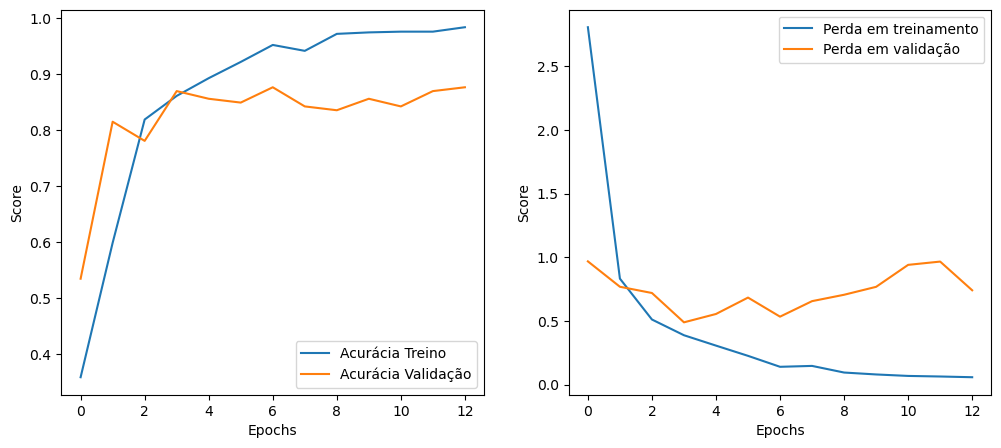

In [15]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(hist_1.history['accuracy'], label='Acurácia Treino')
plt.plot(hist_1.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_1.history['loss'], label='Perda em treinamento')
plt.plot(hist_1.history['val_loss'], label='Perda em validação')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.show()


In [16]:
model_v1.save('modelo_meterologico.keras')
mapa_classes = train_data.class_indices
with open('dicionario_classes_modelo.json', 'w') as file:
    json.dump(mapa_classes, file, indent=4)

### Realizando uma Previsão Aleatória

In [17]:
modelo = load_model('modelo_meterologico.keras')
with  open('dicionario_classes_modelo.json', 'r') as file:
    dicionario = json.load(file)

In [18]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1050)           │    45,428,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         4,204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,368,116 (520.20 MB)

 Trainable params: 45,456,038 (173.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 90,912,078 (346.80 MB)

In [19]:
dicionario

{'Cloud': 0, 'Rain': 1, 'Shine': 2, 'Sunrise': 3}

In [20]:
def preditor_imagem(caminho_foto):
    imagem = image.load_img(caminho_foto, target_size=(224,224,3))
    imagem_arr = image.img_to_array(imagem)
    imagem_arr = np.expand_dims(imagem_arr, axis=0)
    imagem_arr = imagem_arr / 255.0

    y_pred = modelo.predict(imagem_arr)
    y_pred_class = np.argmax(y_pred, axis=1)
    tradutor = {v:k for k, v in dicionario.items()}
    target = tradutor[y_pred_class[0]]

    plt.figure(figsize=(8,8))
    imm = plt.imread(caminho_foto)
    plt.imshow(imm)
    plt.title(f"O clima está: {target}", size=15)
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


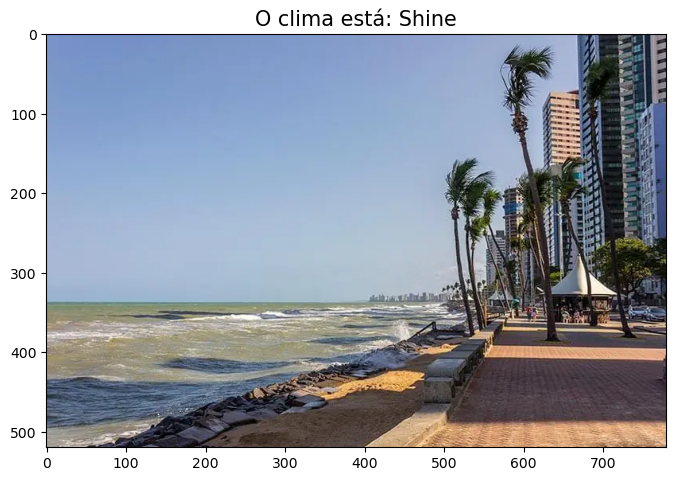

In [24]:
preditor_imagem('./datasets/nature-dataset/My_test/foto_teste_9.jpg')

Levando em consideração a quantidade de dados para treinamento, nosso modelo está muito bem! ;)

## Fim

In [25]:
%reload_ext watermark
%watermark --iversions

matplotlib: 3.8.4
json      : 2.0.9
tensorflow: 2.17.0
PIL       : 10.0.1
numpy     : 1.26.4
keras     : 3.4.1

